---
## Ensemble Learning and Random Forest
#### Language: Python 3.8.8
#### Author: Tianjian Sun
---

### Table of Contents
- [Introduction](#Introduction)
- [Algorithm](#Algorithm)
    - [Ensemble learrning](#Ensemble)
    - [Bootstrap Aggregating](#Bootstrap)
    - [Random Forest](#Random)
- [Illustration](#Illustration)
- [Advantages and Disadvantages](#Advantages)
    - [Advantages](#Advantages)
    - [Disadvantages](#Disadvantages)
- [Code and Applications](#Code)
    - [Ensemble Learning](#Code_ensemble)
    - [Bootstrap Aggregating with Decision Trees](#Code_Bootstrap)
    - [Random Forest](#Code_Random)

---

### Introduction <a class="anchor" id="Introduction"></a>

[Ensemble learrning](https://en.wikipedia.org/wiki/Ensemble_learning) is a group of predictors, and it makes decision by majority vote for classification (hard voting classifier) and averaging for regression. It's a kind of *Supervised learning*, which uses multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone. Unlike a statistical ensemble in statistical mechanics, which is usually infinite, a machine learning ensemble consists of only a concrete finite set of alternative models, but typically allows for much more flexible structure to exist among those alternatives.

Usually bootstrap aggregating (bagging) method is used in ensemble learning, to create multiple weak learners. [Bootstrap aggregating](https://en.wikipedia.org/wiki/Bootstrap_aggregating) is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting. Although it is usually applied to decision tree methods, it can be used with any type of method. Bagging is a special case of the model averaging approach.

[Random Forest](https://en.wikipedia.org/wiki/Random_forest) is perhaps the most popular ensemble learning method for classification and regression. It constructs a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned. Random forest correct for decision trees habit of overfitting to their training set. Random forest generally outperforms decision trees.

### Algorithm <a class="anchor" id="Algorithm"></a>

#### Ensemble Learning <a class="anchor" id="Ensemble"></a>
The algorithm of ensemble learning is really simple: take the majority vote (for classification) or average (for regression) of all weak learners, as the prediction of ensemble learning model. Weak learners could be any kinds of machine learning models, so ensemble learning is quite flexible. 

But there's a key problem for ensemble Learning: learners of ensemble learning should not be similar wit each other, or there's no difference between only use one learner. That's to say, learners should be **uncorrelated**. This is very similar to the diversity opinion these days, as people from different religions, cultures and so on may have very different ideas, but together team with high diversity could do a good job.

To deal with this peoblem, bootstrap aggregating is a good way to reduce the correlation of training data among different learners.

#### Bootstrap Aggregating <a class="anchor" id="Bootstrap"></a>

(From [Wikipedia](https://en.wikipedia.org/wiki/Bootstrap_aggregating)))Given a standard training set $D$ of size $n$, bootstrap aggregating generates $m$ new training sets $D_{i}$, each of size $n'$, by sampling from $D$ uniformly and with replacement. By sampling with replacement, some observations may be repeated in each $D_{i}$. If $n'=n$, then for large n the set $D_{i}$ is expected to have the fraction $(1 - 1/e) ≈63.2\%$ of the unique examples of $D$, the rest being duplicates. 

Sampling with replacement ensures each bootstrap is independent from its peers, as it does not depend on previous chosen samples when sampling. Then, $m$ models are fitted using the above m bootstrap samples and combined by averaging the output (for regression) or voting (for classification).

#### Random Forest <a class="anchor" id="Random"></a>

Briefly, random forest is a kind of ensemble learning which all learners are decision trees and each decision tree uses training data sample from bootstrap aggregating. It was first proposed by [Ho](https://web.archive.org/web/20160417030218/http://ect.bell-labs.com/who/tkh/publications/papers/odt.pdf) in 1995.

Random forest is a great ensemble learning model, since each weak learner (a decision tree) is super easy and fast to train, and by bootstrap aggregating and other methods (like selecting a subset of features in each split), each decision tree is highly uncorrelated, so the results of weak learners are uncorrelated, but the majority vote or average prediction is good.

The algorithm of random forest is as follows

Apply the general technique of bootstrap aggregating, or bagging, to tree learners. Given a training set $X$ with responses $y$, repeatedly $B$ times samples with replacements of the training set and fits trees to these samples:

For $b = 1, ..., B$:

* Sample with replacement $n$ training examples from $X$, $Y$, as $X_b$, $Y_b$.
* Train a tree $f_b$ on $X_b$, $y_b$. In each split of a tree, only a random subset of the features are able to be selected. This process is sometimes called "feature bagging".

After training, predictions for unseen samples $x'$ can be made by averaging the predictions from all the individual regression trees on $x'$:

$$\hat{f} = \frac{1}{B} \sum_{b=1}^Bf_b (x')$$


---
### Illustration <a class="anchor" id="Illustration"></a>

Ensemble learning, bootstrap aggregating and random forest are easy to understand. The following figures are from [Bootstrap aggregating - Wikipedia](https://en.wikipedia.org/wiki/Bootstrap_aggregating) and [Random forest - Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

<img src="images/Ensemble.svg" alt="drawing" width="500"/>


<img src="images/Random_forest.png" alt="drawing" width="400"/>

### Advantages and Disadvantages of Random Forest <a class="anchor" id="Advantages"></a>
#### Advantages
- Good performance on a large amont of tasks (except images data set).
- Running fast
- General to almost all kinds of classification and regression problems.
- Accept both numeric and categorical data.
- Can deal with missing data and no need of normalization.
- Easy to interprete feature importance

#### Disadvantages <a class="anchor" id="Disadvantages"></a>
- May face a high overfitting risk
- Parameter turning is needed.
- Cannot deal with categoric data with levels


--- 
### Code and Applications <a class="anchor" id="Code"></a>

#### Ensemble Learning <a class="anchor" id="Code_ensemble"></a>
* classification: *wine* data set


#### import necessary packages
- pandas
- numpy
- matplotlib
- sklearn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns

Load the *wine* data set.

In [2]:
X, y = load_wine(return_X_y=True, as_frame=True)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Split data into training and test data sets.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

First let's try logistic regression classifier, multi-layer perceptron classifier and decision tree classifier independently, to check their performances.

Use logistic regression classifier, multi-layer perceptron classifier and decision tree classifier to build an ensemble model for classify wine types.

In [4]:
log_clf = LogisticRegression(max_iter=10000)
mlp_clf = MLPClassifier(max_iter=10000)
dt_clf = DecisionTreeClassifier()

In [13]:
for clf in [log_clf, mlp_clf, dt_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'{clf.__class__.__name__}, accuracy score = {accuracy_score(y_test, y_pred)}')

LogisticRegression, accuracy score = 0.9333333333333333
MLPClassifier, accuracy score = 0.9111111111111111
DecisionTreeClassifier, accuracy score = 0.9333333333333333


Looks like these three models have good performances, while logistic regression and decision tree are better.

Plot the confusion matrice of three models.

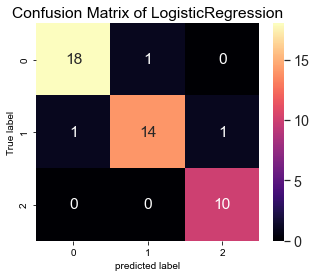

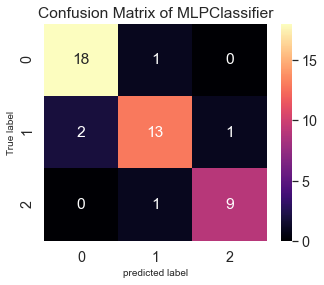

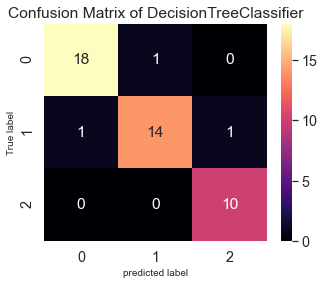

In [6]:
for clf in [log_clf, mlp_clf, dt_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

    matrix_df = pd.DataFrame(confusion_matrix)

    plt.figure(figsize=(5,4))
    ax=plt.axes()
    sns.set(font_scale=1.3)

    sns.heatmap(matrix_df, annot=True, fmt='g', ax=ax, cmap='magma')
    ax.set_title(f'Confusion Matrix of {clf.__class__.__name__}')
    ax.set_xlabel('predicted label', fontsize=10)
    ax.set_ylabel('True label', fontsize=10)
    plt.show()

These three models have similar prediction results.

Let's try to ensemble these three models and check the performance of ensemble model.

In [7]:
voting_clf = VotingClassifier([('lr', log_clf),
                               ('mlp', mlp_clf),
                               ('dt', dt_clf)], voting='hard'
                               )
voting_clf.fit(X_train, y_train)
test_pred = voting_clf.predict(X_test)
print(f'{voting_clf.__class__.__name__}, accuracy score = {accuracy_score(y_test, y_pred)}')

VotingClassifier, accuracy score = 0.9333333333333333


Looks like the ensemble model is as good as the best individual models.

Check the confusion matrix of predictions.

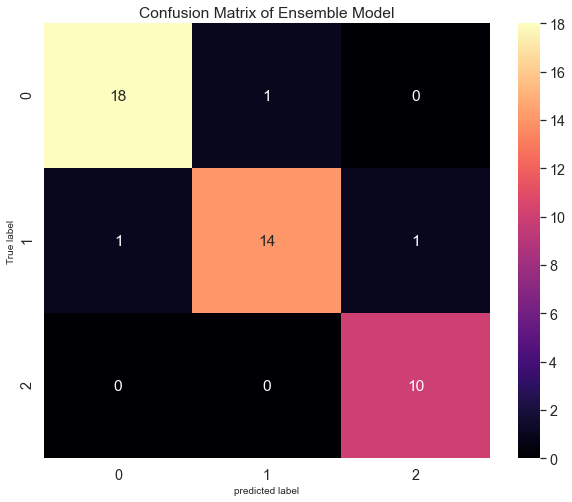

In [8]:
confusion_matrix = metrics.confusion_matrix(y_test, test_pred)

matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize=(10,8))
ax=plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df, annot=True, fmt='g', ax=ax, cmap='magma')
ax.set_title('Confusion Matrix of Ensemble Model')
ax.set_xlabel('predicted label', fontsize=10)
ax.set_ylabel('True label', fontsize=10)
plt.show()

A good prediction, but it's the same as the logistic regression and decision tree. But at least it avoids a worse decision from MLP model, and increases some reliability.

#### Bootstrap Aggregating with Decision Trees  <a class="anchor" id="Code_Bootstrap"></a>
* classification: *wine* data set

Let' train each decision tree learner on a random subset of the training data set (with replacement), using the same data set.

In [9]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(f'{bag_clf.__class__.__name__}, accuracy score = {accuracy_score(y_test, y_pred)}')

BaggingClassifier, accuracy score = 0.9777777777777777


The result is better than the ensemble model above.

Check the confusion matrix of predictions.

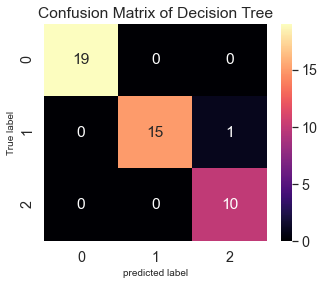

In [10]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize=(5,4))
ax=plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df, annot=True, fmt='g', ax=ax, cmap='magma')
ax.set_title('Confusion Matrix of Decision Tree')
ax.set_xlabel('predicted label', fontsize=10)
ax.set_ylabel('True label', fontsize=10)
plt.show()

Only one test data is misclassified, a realy good result.

#### Random Forest <a class="anchor" id="Code_Random"></a>
* classification: *wine* data set

Let' train Random Forest on the training data set, using the same data set.

In [11]:
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)
print(f'{RF_clf.__class__.__name__}, accuracy score = {accuracy_score(y_test, y_pred)}')

RandomForestClassifier, accuracy score = 0.9777777777777777


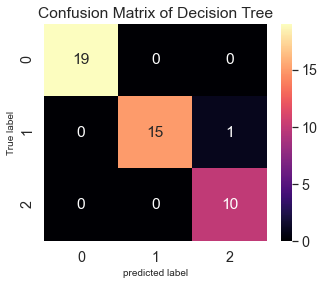

In [12]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize=(5,4))
ax=plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df, annot=True, fmt='g', ax=ax, cmap='magma')
ax.set_title('Confusion Matrix of Decision Tree')
ax.set_xlabel('predicted label', fontsize=10)
ax.set_ylabel('True label', fontsize=10)
plt.show()

The Random Forest model has the same performance as the Bootstrap Aggregating with Decision Trees model. Since the only difference is that Random Forest selects features from a subset of features, it shows that this task is relatively simple that it's not too hard to predict the labels, so feature bagging is not necessary.

Let's see the feature importance in the random forest model.

In [40]:
f_importance = RF_clf.feature_importances_
features = X.columns
f_imp_dict = {features[i]: f_importance[i] for i in range(len(features))}
sorted_dict = {k: v for k, v in sorted(f_imp_dict.items(), key=lambda item: item[1], reverse=True)}
sorted_features = list(sorted_dict.keys())
print(f'The most important 3 features are: {sorted_features[0]}, {sorted_features[1]} and {sorted_features[2]}')

The most important 3 features are: proline, color_intensity and flavanoids


Thus we get the top three features which may have the greatest impact on wine types.